### RANDOM FOREST
- Dataset 4 features dengan 1000 rows:(optional) => trainning & testing
- Bootstrapped data => Dataset baru 1000 rows => Data yang ga diambil (out of bag) untuk testing

Dalam 1 bootstrapped data:
- Create decision tree, => hanya 2 features secara random => hitung (gini/ entrophy) => decison tree (6x)
- Create decision tree, => hanya 3 features secara random => hitung (gini/ entrophy) => decison tree (3x)
Create decision tree, => hanya 4 features secara random => hitung (gini/ entrophy) => decison tree (1x)

In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn import tree
from subprocess import call
from sklearn.metrics import confusion_matrix, accuracy_score, roc_auc_score, roc_curve

In [2]:
data = load_iris()
iris = pd.DataFrame(data['data'], columns=['SL','SW','PL','PW'])
iris['target'] = data['target']
iris.head()

,SL,SW,PL,PW,target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [3]:
xtr, xts, ytr, yts = train_test_split(iris[['SL', 'SW', 'PL', 'PW']], iris['target'], test_size=.2)

In [4]:
rfc = RandomForestClassifier(n_estimators=10)
rfc.fit(xtr, ytr)
rfc.estimators_

[DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                        max_depth=None, max_features='auto', max_leaf_nodes=None,
                        min_impurity_decrease=0.0, min_impurity_split=None,
                        min_samples_leaf=1, min_samples_split=2,
                        min_weight_fraction_leaf=0.0, presort='deprecated',
                        random_state=2048578779, splitter='best'),
 DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                        max_depth=None, max_features='auto', max_leaf_nodes=None,
                        min_impurity_decrease=0.0, min_impurity_split=None,
                        min_samples_leaf=1, min_samples_split=2,
                        min_weight_fraction_leaf=0.0, presort='deprecated',
                        random_state=1016267049, splitter='best'),
 DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                        max_depth=None, 

In [5]:
# tree.plot_tree(model.estimators_[0])
for i in range(len(rfc.estimators_)):
    tree.export_graphviz(rfc.estimators_[0], out_file=f'rf{i}.dot', feature_names=['SL','SW','PL','PW'], class_names=['setosa','versicolor','virginica'], rounded=True, filled=True
)

In [6]:
# call(['dot', '-Tpng', 'rf0.dot', 'rf0.png', 'Gdpi=520'])

In [7]:
rfc.predict([xts.iloc[0]])[0]

0

In [9]:
yts.loc[xts.iloc[0].name]

0

In [10]:
rfc.score(xts, yts)

0.9666666666666667

In [11]:
rfc.feature_importances_

array([0.09457872, 0.04049277, 0.42441732, 0.44051119])

In [13]:
cm = confusion_matrix(yts, rfc.predict(xts), labels=[0,1,2])
cm = pd.DataFrame(cm, columns=['Pred 0', 'Pred 1', 'Pred 2'],
index=['Actual 0', 'Actual 1', 'Actual 2'])
cm

,Pred 0,Pred 1,Pred 2
Actual 0,15,0,0
Actual 1,0,6,0
Actual 2,0,1,8


In [15]:
accuracy_score(yts, rfc.predict(xts))

0.9666666666666667

In [17]:
rfc.predict_proba(xts)[:,0]
rfc.predict_proba(xts)[:,1]
rfc.predict_proba(xts)[:,2]

array([0. , 1. , 0. , 0.4, 0. , 1. , 0.8, 0.9, 0.9, 0. , 0. , 0. , 0. ,
       0. , 0. , 0. , 0. , 0. , 1. , 1. , 0. , 0. , 0. , 1. , 0. , 0. ,
       0. , 0. , 0. , 0. ])

In [23]:
fpr, tpr, th  = roc_curve(yts, rfc.predict_proba(xts)[:,0], pos_label=0)

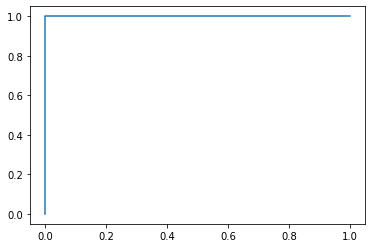

In [24]:
plt.plot(fpr, tpr)

In [25]:
roc_auc_score(np.array(yts.tolist()),rfc.predict_proba(xts),labels=[0,1,2],multi_class='ovo')

1.0